<h2><font color="#004D7F" size=6> Concender un crédito </font></h2>



<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Danyela Luengas</font><br>
<font color="#004D7F" size=3> ML Aprendizaje  Supervisado</font><br>

## Contenidos.

* [Parte 1.](#parte_1) Filtrado y procesamiento
* [Parte 2.](#parte_2) Selección de parámetros.
* [Parte 3.](#parte_3) Modelos de clasificación y métricas de desempeño
    
    * [Regresión logística.](#rl)
    * [Random Forest](#rf)
    * [Gradient Boosting](#gb)
* [Parte 4.](#parte_4) Análisis y conclusiones

In [78]:
# Se importan todas las librerías necesarias.

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

plt.rcParams['figure.figsize']=('12, 6')# figuras de 12*6
plt.style.use('ggplot')

## [Parte 1. Filtrado y procesamiento](#Contenidos.) <a class="anchor" id="parte_1"></a>

In [2]:
""" Se lee el archivo CSV y se guarda en el dataframe DF"""
DF = pd.read_csv('train.csv', index_col='ID')
DF

C:\Users\daalu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3221: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [3]:
""" Notar que la base de datos tiene 100'000 muestras (filas) y 27 atributos (columnas) """
DF.shape

(100000, 27)

In [4]:
""" La información del dataframe nos muestra el tipo de dato en cada columna. Observar que hay una gran cantidad de columnas con datos 
no numéricos. Esto deberá ser corregido si queremos considerar estas características para futuros modelos de clasificación.
Por lo tanto, la codificiación de varios atributos será necesario. """
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  

In [5]:
""" Se observan los nombres de todas las columnas. """
DF.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
""" De las columnas numéricas se obtiene la descripción estadística. Notar que hay algunos valores anormales, como números negativos en 
columnas que no deberían tenerlos, o valores máximos muy grandes en columnas cuyos cuartiles no son tan elevados. """
DF.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
""" Se imprimen las etiquetas categóricas que existen en la columna 'Payment_Behaviour'. Notar que hay una etiqueta extraña de nombre 
'!@9#%8' y con muchas repeticiones. """
DF['Payment_Behaviour'].value_counts()


Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [8]:
""" Se imprimen las etiquetas categóricas que existen en la columna 'SSN'. Notar que hay una etiqueta extraña de nombre 
'#F%$D@*&8' y con muchas repeticiones. """

DF['SSN'].value_counts()

#F%$D@*&8      5572
637-99-8103       8
063-94-6538       8
353-00-0111       8
849-10-1285       8
               ... 
753-72-2651       4
604-62-6133       4
642-73-7670       4
838-33-4811       4
856-06-6147       4
Name: SSN, Length: 12501, dtype: int64

In [9]:
""" Se reemplazan todos los valores extraños de las columnas no numéricas del set de datos por el valor np.NaN """
DF = DF.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

""" Se imprime la suma de todas las muestras que tienen valores nulos (NaN) en cada columna del set de datos. """
empty_space_df = DF.isna().sum()
empty_space_df

Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Text(0.5, 1.0, 'Valores faltantes en la base de datos')

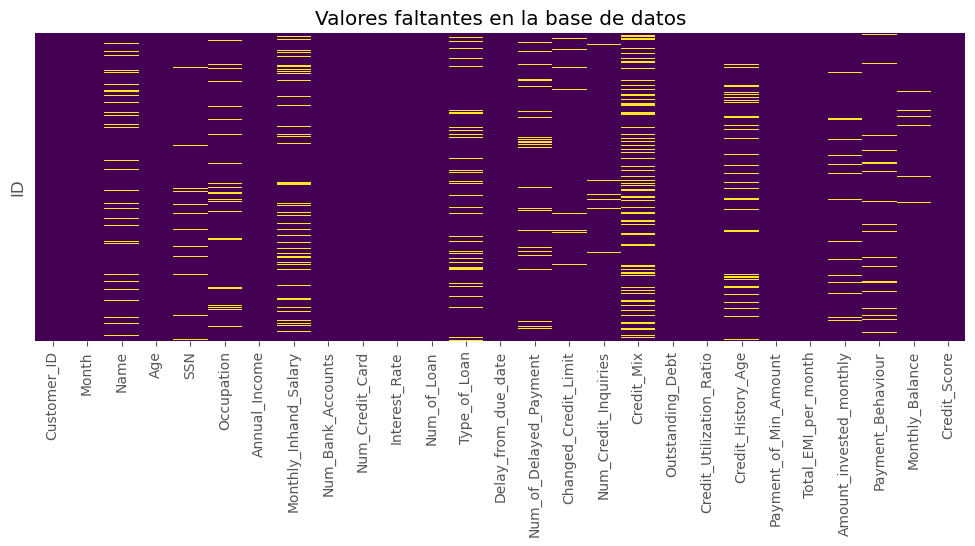

In [10]:
""" Se grafican los datos faltantes en cada columna del set de datos. """

plt.figure(figsize=(12,4))
sns.heatmap(DF.isnull(), cbar=False, cmap = 'viridis', yticklabels=False)
plt.title('Valores faltantes en la base de datos')

In [11]:
""" Se corrige el tipo de dato que se espera que exista en cada columna del set. """

DF['Age'] = DF.Age.astype(int)


DF['Annual_Income'] = DF.Annual_Income.astype(float)


DF['Num_of_Loan'] = DF.Num_of_Loan.astype(int) 


DF['Num_of_Delayed_Payment'] = DF.Num_of_Delayed_Payment.astype(float)

DF['Changed_Credit_Limit'] = DF.Changed_Credit_Limit.astype(float)



DF['Outstanding_Debt'] = DF.Outstanding_Debt.astype(float)


DF['Amount_invested_monthly'] = DF.Amount_invested_monthly.astype(float)

DF['Monthly_Balance'] = DF.Monthly_Balance.astype(float)


""" La columna 'Credit_History_Age' tiene texto que hace referencia a la cantidad de historial que tiene el usuario en cuestión. Para poder trabajar
con esta columna, se obtiene un valor numérico apartir del texto de la columna original. Esto se hace gracias a la función 'Month_Converter' """

def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x


DF['Credit_History_Age'] = DF.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)


In [12]:
""" Se obtiene una descrición de las variables numéricas del set de datos. Notar que ahora hay más variables numéricas que el set de datos
original. Una vez más, se observan valores anómalos en algunas columnas, los cuales se van a filtrar a continuación basándonos en suposiciones
intuitivas. """
DF.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,90970.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,221.195405,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,99.741364,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,144.000000,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,219.000000,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,302.000000,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,404.000000,82331.000000,10000.000000,1.602041e+03


In [13]:
""" Se eliminan las observaciones cuya edad ('Age') del usuario esté por debajo de los 20 años o por encima de los 90.
Usualmente los individuos entre 20 y 90 años son quienes poseen una calificación crediticia. """
DF.drop(DF[DF['Age'] < 20].index, inplace=True)
DF.drop(DF[DF['Age'] > 90].index, inplace=True)

#to drop the entries having unrealistic Annual Income, which is greater 1000000.00
""" Se eliminan las observaciones con ingresos anuales ('Annueal_Income') poco realistas, superiores al 1'000'000 de dolares. """
DF.drop(DF[DF['Annual_Income'] > 1000000.00].index, inplace = True)

""" Se limita que el número de cuentas bancarias que cada individuo tiene sea entre 0 y 10. Una cantidad de cuentas fuera de
este rango suena poco plausible. """
DF.drop(DF[DF['Num_Bank_Accounts']>10].index, inplace = True)
DF.drop(DF[DF['Num_Bank_Accounts']<0].index, inplace = True)

""" Se limita que el número de tarjetas de crédito que cada individuo tiene sea entre 0 y 10. Una cantidad fuera de
este rango suena poco plausible. En este caso no hay necesidad de preocuparnos por valores negativos, pues no hay ninguno."""
DF.drop(DF[DF['Num_Credit_Card'] > 10].index, inplace = True)

""" Se eliminan las observaciones con tasas de interes ('Interest_Rate') poco realistas, superiores a 1'000. """
DF.drop(DF[DF['Interest_Rate'] >1000.0].index, inplace = True)

""" Se limita que el número de deudas que cada individuo tiene sea entre 0 y 120. Una cantidad fuera de
este rango suena improbable."""
DF.drop(DF[DF['Num_of_Loan'] < 0].index, inplace = True)
DF.drop(DF[DF['Num_of_Loan'] > 20].index, inplace = True)

""" Se eliminan valores negativos en la columna 'Delay_from_due_date'. No tiene sentido que esta columna tenga valores inferiores a 0"""
DF.drop(DF[DF['Delay_from_due_date'] < 0].index, inplace = True)

""" Se eliminan valores negativos en la columna 'Num_of_Delayed_Payment'. No tiene sentido que esta columna tenga valores inferiores a 0"""
DF.drop(DF[DF['Num_of_Delayed_Payment'] < 0].index, inplace = True)

""" Se eliminan observaciones con valores de Credit Inquiries mayores a 10. En esta columna hay cantidades mucho mayores el grueso de los datos. """
DF.drop(DF[DF['Num_Credit_Inquiries'] > 10].index, inplace = True)

""" Se eliminan observaciones con valores de EMI por mes mayores a 10'000, cantidad que es muy superior al resto de datos de la columna. """
DF.drop(DF[DF['Total_EMI_per_month'] > 10000.00].index, inplace = True)

""" Se eliminan observaciones con un balance mensual inferior a -2'000. Esto se hace debido a que esta columna tiene valores tan negativos que 
parecen irreales.  """
DF.drop(DF[DF['Monthly_Balance'] < -2000.0].index, inplace = True)


(63480, 27)


Text(0.5, 1.0, 'Valores faltantes en la base de datos')

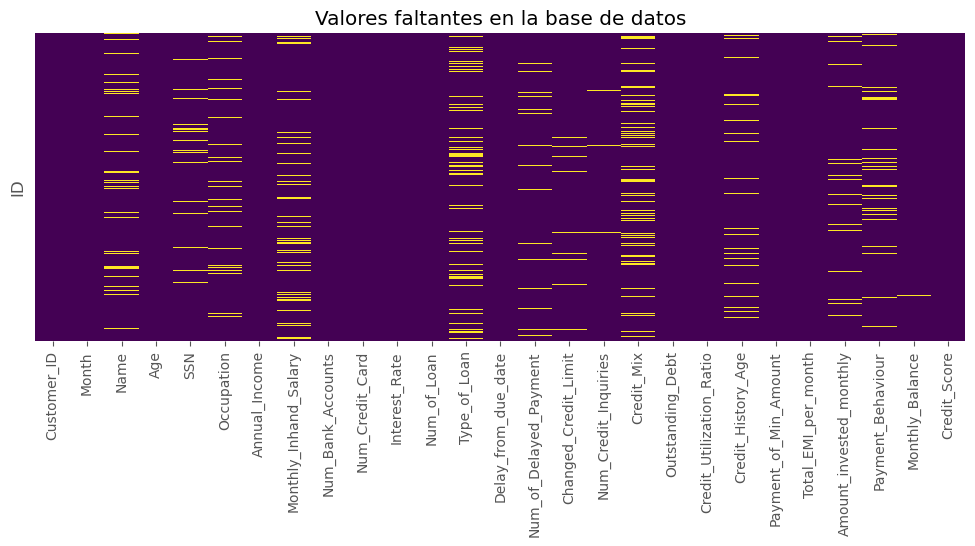

In [14]:
""" Se grafican los datos faltantes en cada columna del set de datos. """

print(DF.shape)
plt.figure(figsize=(12,4))
sns.heatmap(DF.isnull(), cbar=False, cmap = 'viridis', yticklabels=False)
plt.title('Valores faltantes en la base de datos')

## [Parte 2. Selección de parámetros.](#Contenidos.) <a class="anchor" id="parte_2"></a>

In [15]:
""" La información del dataframe nos muestra el tipo de dato en cada columna. La columnas no numéricas, de tipo 'object', deberán ser codificadas a 
un formato de etiquetas numéricas. """

DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63480 entries, 0x1602 to 0x25fed
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               63480 non-null  object 
 1   Month                     63480 non-null  object 
 2   Name                      57146 non-null  object 
 3   Age                       63480 non-null  int32  
 4   SSN                       59976 non-null  object 
 5   Occupation                59014 non-null  object 
 6   Annual_Income             63480 non-null  float64
 7   Monthly_Inhand_Salary     53829 non-null  float64
 8   Num_Bank_Accounts         63480 non-null  int64  
 9   Num_Credit_Card           63480 non-null  int64  
 10  Interest_Rate             63480 non-null  int64  
 11  Num_of_Loan               63480 non-null  int32  
 12  Type_of_Loan              54791 non-null  object 
 13  Delay_from_due_date       63480 non-null  int64  
 14  Num_

In [16]:
""" Se eliminnan las columnas cuyo tipo no sea numérico y tampoco puedan ser codificables. Estas columnas es muy posible que tampoco brinden gran
ayuda al momento de entrenar el modelo de clasificación.  """
DF.drop(['Customer_ID','Name','SSN'],axis=1,inplace=True)

""" Se elimina la característica 'Type_of_Loan' debido a que son demasiadas etiquetas únicas (más de 5'000) como para ser codificadas 
en formato numérico. El procesamiento de esta codificación supera las capacidades de mi equipo"""
DF.drop(['Type_of_Loan'],axis=1,inplace=True) 

# arange = pd.unique(DF['Type_of_Loan'])
# arange_num = np.arange(len(arange))
# DF['Type_of_Loan'] = DF['Type_of_Loan'].replace(arange, arange_num)


In [17]:
""" Se codifican el resto de columnas no numéricas. Es importante considerar que los valores nulos que pudieran llegar a existir en cada 
columna también son codificados, obteniendo un etiquetado numérico según el caso. Por lo tanto, con este proceso se puede decir que se reemplazan
los valores nulos de estas columnas por etiquetas numéricas. """

arange = pd.unique(DF['Month'])
arange_num = np.arange(len(arange))
DF['Month'] = DF['Month'].replace(arange, arange_num)

arange = pd.unique(DF['Payment_of_Min_Amount'])
arange_num = np.arange(len(arange))
DF['Payment_of_Min_Amount'] = DF['Payment_of_Min_Amount'].replace(arange, arange_num)

arange = pd.unique(DF['Credit_Mix'])
arange_num = np.arange(len(arange))
DF['Credit_Mix'] = DF['Credit_Mix'].replace(arange, arange_num)

arange = pd.unique(DF['Occupation'])
arange_num = np.arange(len(arange))
DF['Occupation'] = DF['Occupation'].replace(arange, arange_num)

arange = pd.unique(DF['Credit_Score'])
arange_num = np.arange(len(arange))
DF['Credit_Score'] = DF['Credit_Score'].replace(arange, arange_num)

arange = pd.unique(DF['Payment_Behaviour'])
arange_num = np.arange(len(arange))
DF['Payment_Behaviour'] = DF['Payment_Behaviour'].replace(arange, arange_num)


In [18]:
""" Ahora que se tienen a todas las columnas del set de datos como numéricas, se obtiene su correlación. """
DF.corr()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Month,1.000000,0.001235,0.000888,0.004743,0.006618,-0.006050,-0.005519,0.003455,-0.006460,-0.005477,...,-0.002141,-0.007341,0.003397,0.013237,-0.004508,-0.003746,0.002015,-0.001605,0.002072,-0.003660
Age,0.001235,1.000000,0.010463,0.052755,0.050887,-0.138442,-0.101273,-0.038725,-0.156202,-0.128053,...,-0.099013,-0.146225,0.017144,0.173010,-0.182155,-0.012755,0.001406,0.012113,0.069946,-0.115400
Occupation,0.000888,0.010463,1.000000,0.006090,0.005572,0.009219,-0.017189,-0.004408,-0.012287,-0.013096,...,-0.000057,-0.011184,-0.001336,0.021253,-0.006044,-0.006333,-0.001350,0.006546,0.004177,0.001315
Annual_Income,0.004743,0.052755,0.006090,1.000000,0.966505,-0.242382,-0.171300,-0.049444,-0.216678,-0.217513,...,-0.169590,-0.229870,0.179579,0.227568,-0.242794,0.138491,0.061743,0.152229,0.688220,-0.170907
Monthly_Inhand_Salary,0.006618,0.050887,0.005572,0.966505,1.000000,-0.246134,-0.177444,-0.053473,-0.220931,-0.222583,...,-0.174224,-0.237229,0.181957,0.235206,-0.247285,0.144430,0.066218,0.156381,0.707644,-0.171837
Num_Bank_Accounts,-0.006050,-0.138442,0.009219,-0.242382,-0.246134,1.000000,0.387435,0.119465,0.409823,0.521349,...,0.397023,0.443633,-0.070446,-0.420211,0.509638,0.022811,-0.016743,-0.037378,-0.249727,0.332719
Num_Credit_Card,-0.005519,-0.101273,-0.017189,-0.171300,-0.177444,0.387435,1.000000,0.090745,0.364809,0.436456,...,0.282570,0.434535,-0.049596,-0.352812,0.336114,0.022735,-0.009809,-0.030067,-0.186169,0.370274
Interest_Rate,0.003455,-0.038725,-0.004408,-0.049444,-0.053473,0.119465,0.090745,1.000000,0.112618,0.122633,...,0.094738,0.132867,-0.022323,-0.115402,0.122039,0.009083,-0.000812,-0.010251,-0.065032,0.095781
Num_of_Loan,-0.006460,-0.156202,-0.012287,-0.216678,-0.220931,0.409823,0.364809,0.112618,1.000000,0.464842,...,0.335798,0.593350,-0.101289,-0.565877,0.442259,0.121316,-0.010777,-0.043211,-0.396166,0.319259
Delay_from_due_date,-0.005477,-0.128053,-0.013096,-0.217513,-0.222583,0.521349,0.436456,0.122633,0.464842,1.000000,...,0.380612,0.543346,-0.061884,-0.446291,0.447778,0.026167,-0.008937,-0.041823,-0.239461,0.405772


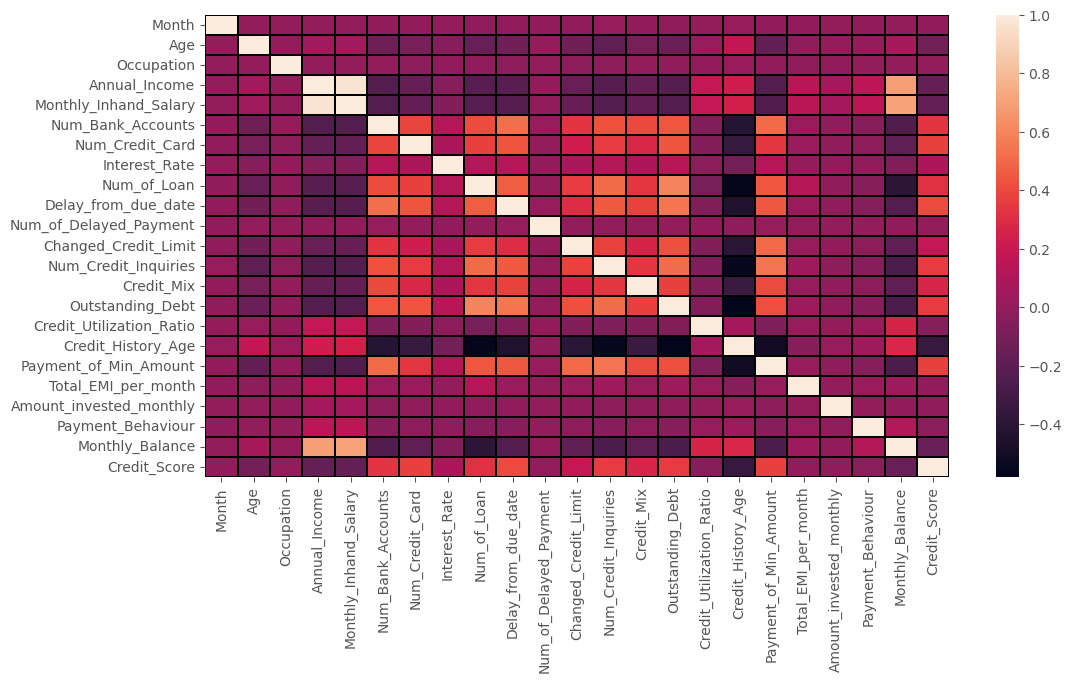

In [19]:
""" Matriz de correlaciones de todas las variables del set de datos. Notar que la variable Credit_score, que en principio es la variable con la que
se busca clasificar a las observaciones, presenta una alta correlación con varios atributos. """
plt.figure(figsize = (12,6))
sns.heatmap(DF.corr(),annot=False,linewidths=0.01, linecolor='black')
plt.show()

In [20]:
""" Basándome en la matriz de correlación y en la cantidad de valores faltantes de cada columna en el dataset original, se eliminaron 
las siguientes columnas:  """

# Estas se eliminan por tener una baja correlación con la columna Credit_Score
DF.drop(['Monthly_Inhand_Salary','Credit_History_Age','Num_of_Delayed_Payment'],axis=1,inplace=True) 


# Estas se eiliminan por tener una alta cantidad de valores nulos originalmente y no tener una correlación significativa con la columna Credit_Score.
DF.drop(['Occupation','Credit_Mix','Amount_invested_monthly','Payment_Behaviour'],axis=1,inplace=True) 


Text(0.5, 1.0, 'Valores faltantes en la base de datos')

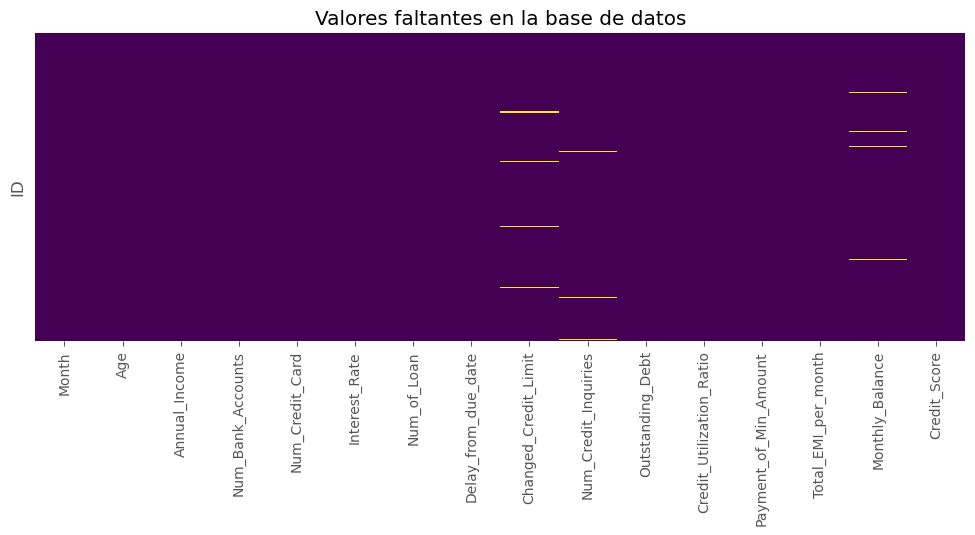

In [21]:
""" Se grafican los datos faltantes en cada columna del set de datos. Notar que ahora tenemos columnas con pocos valores nulos. """

plt.figure(figsize=(12,4))
sns.heatmap(DF.isnull(), cbar=False, cmap = 'viridis', yticklabels=False)
plt.title('Valores faltantes en la base de datos')

In [22]:
""" Se obtiene la cantidad de filas y columnas del set de datos hasta ahora. """
DF.shape

(63480, 16)

In [23]:
""" Ya que se tiene una pequeña cantidad de valores nulos a comparación del resto de datos completo, se eliminan las observaciones con valores nulos.
Se probó también reemplazando los valores nulos por cero, y no hay gran variación en el desempeño de los futuros modelos de clasificación.
Notar que sólo se eliminaron 3'000 observaciones, de 60'000. """
# DF.fillna(0,inplace=True)
DF.dropna(inplace=True, axis=0)
DF.shape

(60015, 16)

Text(0.5, 1.0, 'Valores faltantes en la base de datos')

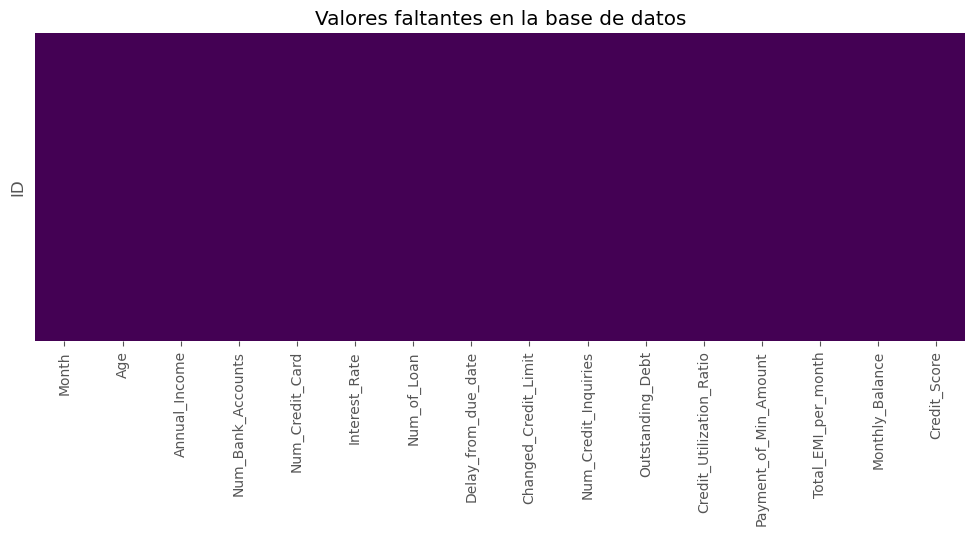

In [24]:
plt.figure(figsize=(12,4))
sns.heatmap(DF.isnull(), cbar=False, cmap = 'viridis', yticklabels=False)
plt.title('Valores faltantes en la base de datos')

Text(0.5, 1.0, 'Distribución e los datos de crédito')

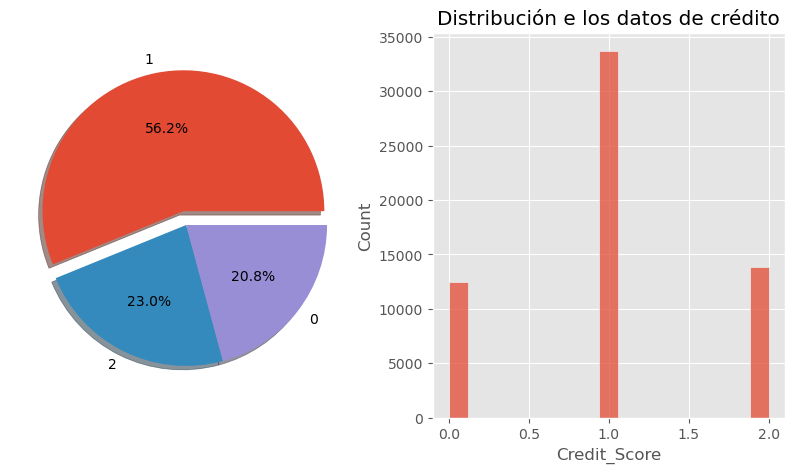

In [56]:
#Cómo estan los datos segun la clasificación.


plt.rcParams['figure.figsize']=('12, 6')# figuras de 12*6
plt.style.use('ggplot') #tono gris

plt.figure(figsize=(10,5))

#plot pie chart
plt.subplot(1,2,1)
label = DF['Credit_Score'].value_counts().index
label_count = DF['Credit_Score'].value_counts().values
plt.pie(data=DF['Credit_Score'], x=label_count, labels=label, autopct='%1.1f%%', explode=[0.1, 0, 0] , shadow=True, radius=1)

#
plt.subplot(1,2,2)
sns.histplot(x=DF['Credit_Score'], data=DF['Credit_Score'])
plt.title('Distribución e los datos de crédito')

In [85]:
dummy_X = DF.drop(['Credit_Score'], axis=1).values
dummy_Y = DF['Credit_Score'].values
X_norm =pd.DataFrame(normalize(dummy_X,axis=0)+1)
best = SelectKBest(chi2, k=5)
best.fit(X_norm,dummy_Y)
#best_array = best.get_feature_names_out(input_features=X_norm)
#print(best_array)


names = X_norm.columns.values[best.get_support()]
scores = best.scores_[best.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

   Feat_names  F_Scores
4          12  0.073374
3          10  0.057578
1           7  0.054613
2           9  0.037278
0           6  0.036773


In [69]:
""" El set de datos se divide en dos arreglos. Uno con todas las columnas excepto Credit_Score, y otro con únicamente la columna Credit_Score.
Estos arreglos son usados con el modelo de chi2 para obtener las 5 mejores características. Notar que el arreglo X, que contiene a la mayoría de 
columnas, tuvo que ser normalizado entre 1 y 2, ya que el modelo de chi2 no acepta valores negativos.

Las 5 mejores características se guardan en el arreglo 'best_array' """

from sklearn.feature_selection import SelectKBest, f_classif

Xx = DF.drop(['Credit_Score'], axis=1).values
Y = DF['Credit_Score'].values

X_norm = pd.DataFrame(normalize(Xx,axis=0)+1)

best =  SelectKBest(chi2, k=7).fit(X_norm, Y)
#best_array = best.get_feature_names_out(input_features=DF.drop(['Credit_Score'], axis=1).columns)

#print(best_array)
best

SelectKBest(k=7, score_func=<function chi2 at 0x000001B8FEB43160>)

La cantidad de filas y columnas del arreglo X de entrenamiento es: (48012, 7)
En el set de entrenamiento, la cantidad de observaciones para la clase 0 es 9984
En el set de entrenamiento, la cantidad de observaciones para la clase 1 es 26963
En el set de entrenamiento, la cantidad de observaciones para la clase 2 es 11065


C:\Users\daalu\anaconda3\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, 'Distribución e los datos de crédito')

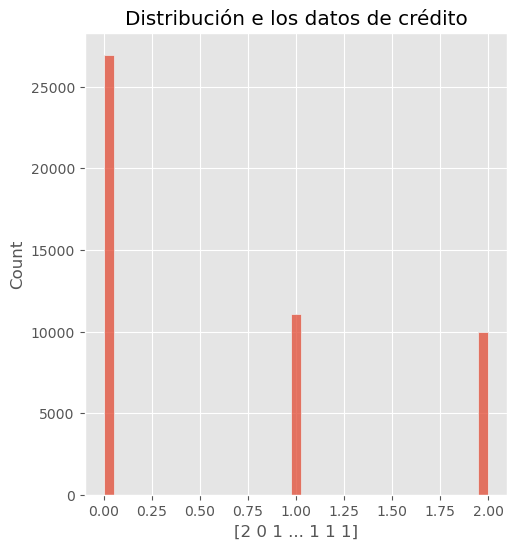

In [70]:
""" Nuevamente, el dataframe se divide en dos arreglos, uno con las cacterísticas con las cuales se va a clasificar cada observación, y otro con
las clasificaciones reales de las observaciones. El arreglo con la mayoría de características (X) nuevamente es normalizado. También podría ser
estandarizado o no haberle hecho ningún cambio, y el desempeño de los siguiente modelos de clasifiación no se vería tan afectado en este caso.

Finalmente, los datos se dividen en sets de entrenamiento y pruebas.

Notar que en el set de entrenamiento, las clases de las observaciones están desbalanceadas. La clase '1' tiene casi 3 veces más observaciones que 
las otras dos ('0' y '2'). """


chi=SelectKBest(score_func=chi2, k=7)
chi.fit(X_norm, Y)

X = pd.DataFrame(chi.transform(X_norm), columns = X_norm.columns[chi.get_support()])

X = normalize(X,axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify = Y)

#42

# scaler = StandardScaler().fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

print(f"La cantidad de filas y columnas del arreglo X de entrenamiento es: {X_train.shape}")


values, counts = np.unique(y_train, return_counts=True)

print(f"En el set de entrenamiento, la cantidad de observaciones para la clase {values[0]} es {counts[0]}")
print(f"En el set de entrenamiento, la cantidad de observaciones para la clase {values[1]} es {counts[1]}")
print(f"En el set de entrenamiento, la cantidad de observaciones para la clase {values[2]} es {counts[2]}")
plt.subplot(1,2,2)
sns.histplot(x=y_train, data=y_train)
plt.title('Distribución e los datos de crédito')

## [Parte 3. Modelos de clasificación y métricas de desempeño](#Contenidos.) <a class="anchor" id="parte_3"></a>

### [Regresión Logística](#Contenidos.) <a class="anchor" id="rl"></a>

In [64]:
""" Entrenamiento, prueba, reporte y métricas del modelo de Regresión Logística. """

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

print("Reporte de modelo con datos de entrenamiento")
print(classification_report(y_train, y_pred_train))
print("----------------------------------------------------")
print("Reporte de modelo con datos de prueba")
print(classification_report(y_test, y_pred_test))

Reporte de modelo con datos de entrenamiento
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9984
           1       0.56      1.00      0.72     26963
           2       0.00      0.00      0.00     11065

    accuracy                           0.56     48012
   macro avg       0.19      0.33      0.24     48012
weighted avg       0.32      0.56      0.40     48012

----------------------------------------------------
Reporte de modelo con datos de prueba
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2496
           1       0.56      1.00      0.72      6741
           2       0.00      0.00      0.00      2766

    accuracy                           0.56     12003
   macro avg       0.19      0.33      0.24     12003
weighted avg       0.32      0.56      0.40     12003



C:\Users\daalu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daalu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daalu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daalu\anaconda3\lib\site-packages\sklearn\metr

Matriz de confusión para los datos de prueba


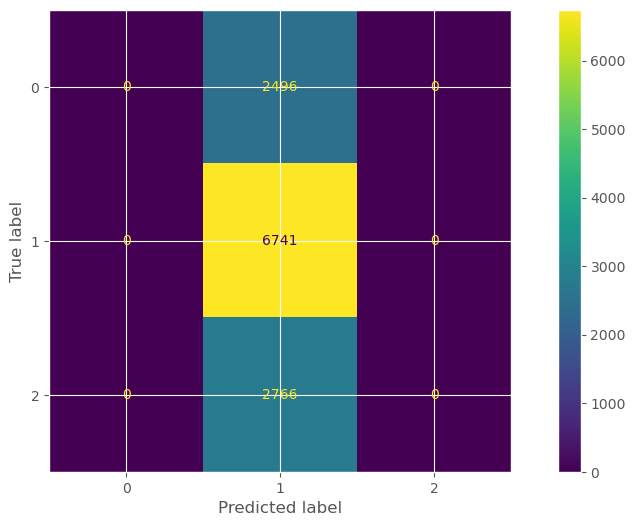

In [30]:
print("Matriz de confusión para los datos de prueba")
cm = confusion_matrix(y_test, y_pred_test, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()
plt.show()

Matriz de confusión para los datos de entrenamiento


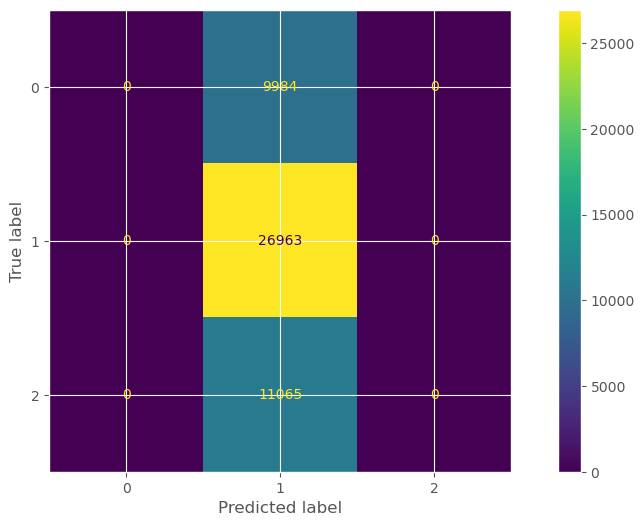

In [31]:
print("Matriz de confusión para los datos de entrenamiento")
cm = confusion_matrix(y_train, y_pred_train, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()
plt.show()

Curva ROC para la clase minoritaria (0)


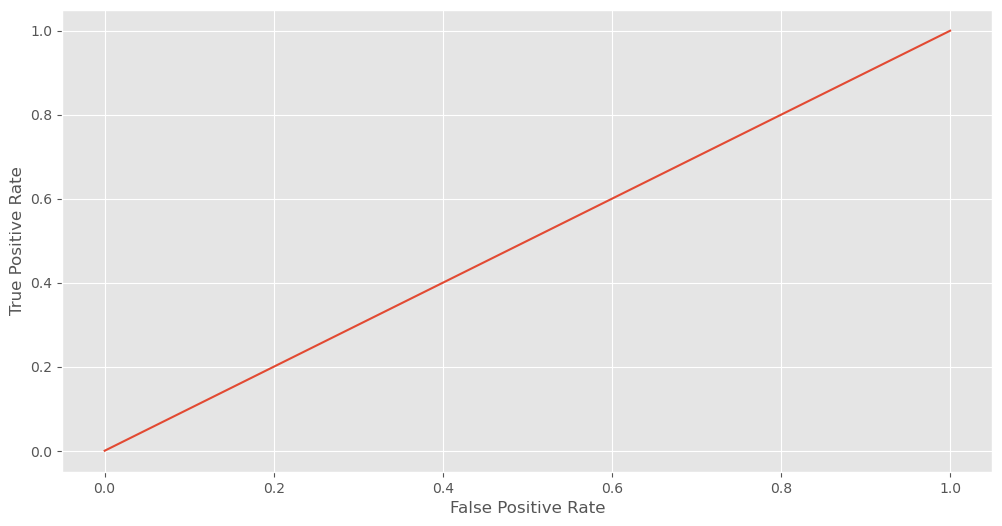

In [32]:
print("Curva ROC para la clase minoritaria (0)")
fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=0)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Curva ROC para la clase mayoritaria (1)


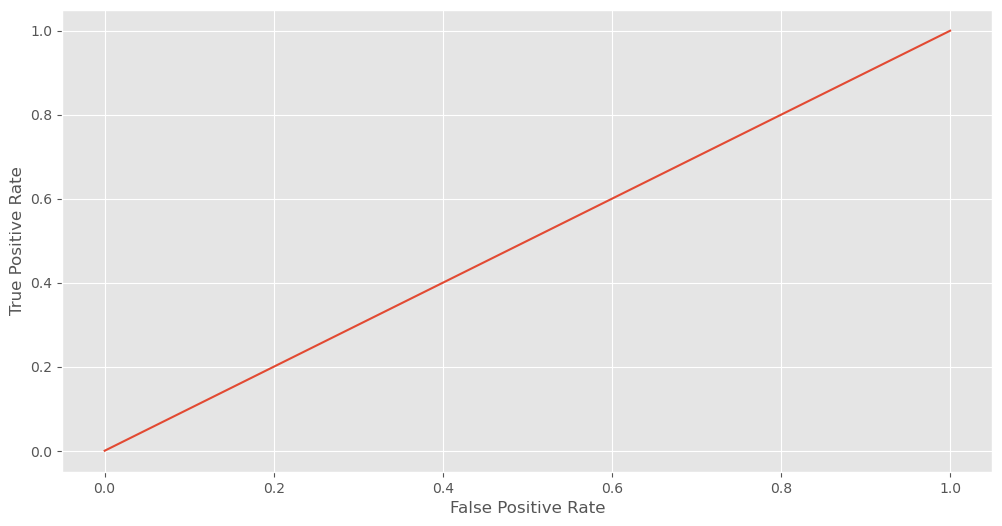

In [33]:
print("Curva ROC para la clase mayoritaria (1)")
fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Curva ROC para la clase minoritaria (2)


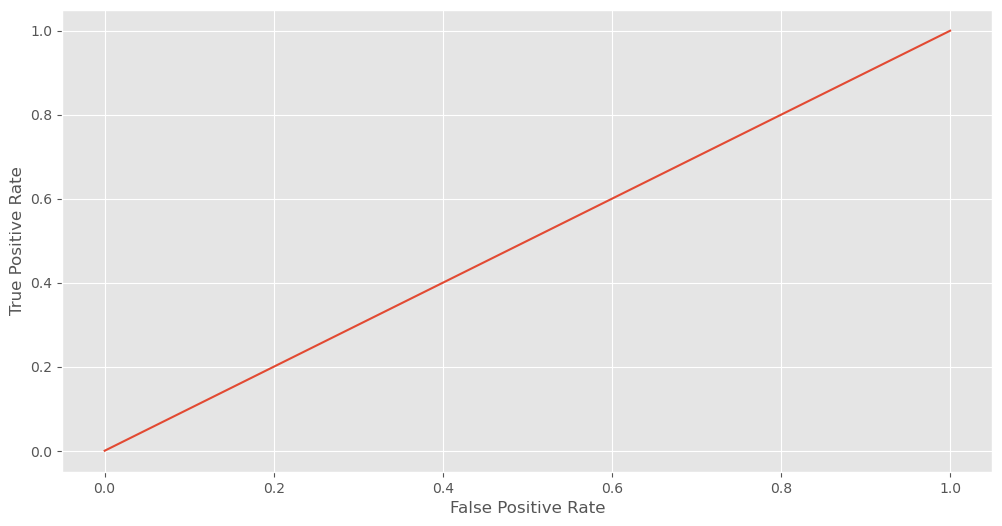

In [34]:
print("Curva ROC para la clase minoritaria (2)")
fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=2)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [35]:
print("Área bajo la curva ROC es: ")
print(roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr'))

Área bajo la curva ROC es: 
0.5197981592555622


### [Random Forest](#Contenidos.) <a class="anchor" id="rf"></a>

In [36]:
""" Entrenamiento, prueba, reporte y métricas del modelo de Random Forest """

RFC = RandomForestClassifier(max_depth=10)
RFC.fit(X_train,y_train)

y_pred_train = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)

print("Reporte de modelo con datos de entrenamiento")
print(classification_report(y_train, y_pred_train))
print("----------------------------------------------------")
print("Reporte de modelo con datos de prueba")
print(classification_report(y_test, y_pred_test))

Reporte de modelo con datos de entrenamiento
              precision    recall  f1-score   support

           0       0.60      0.29      0.39      9984
           1       0.67      0.86      0.75     26963
           2       0.74      0.57      0.64     11065

    accuracy                           0.68     48012
   macro avg       0.67      0.57      0.60     48012
weighted avg       0.67      0.68      0.65     48012

----------------------------------------------------
Reporte de modelo con datos de prueba
              precision    recall  f1-score   support

           0       0.54      0.25      0.34      2496
           1       0.65      0.84      0.74      6741
           2       0.71      0.54      0.61      2766

    accuracy                           0.65     12003
   macro avg       0.63      0.55      0.56     12003
weighted avg       0.64      0.65      0.63     12003



Matriz de confusión para los datos de prueba


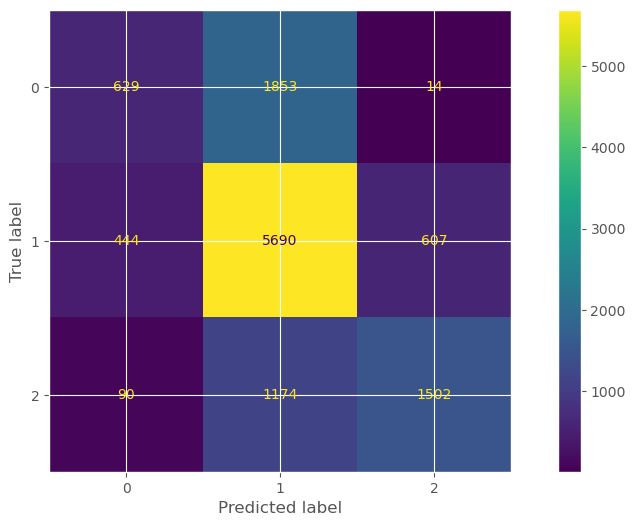

In [37]:
print("Matriz de confusión para los datos de prueba")
cm = confusion_matrix(y_test, y_pred_test, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
disp.plot()
plt.show()

Matriz de confusión para los datos de entrenamiento


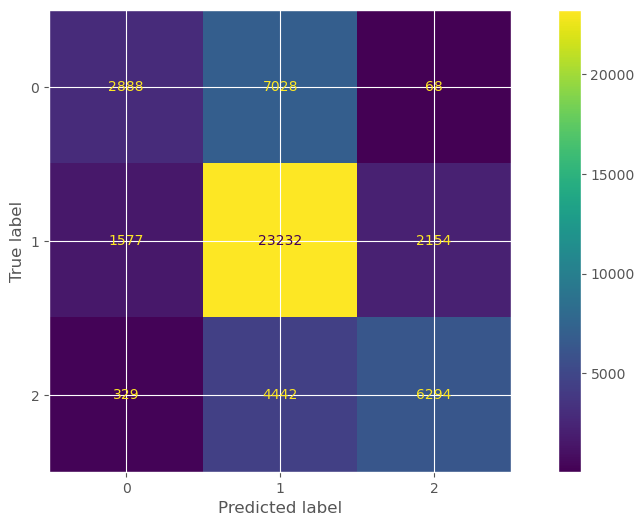

In [38]:
print("Matriz de confusión para los datos de entrenamiento")
cm = confusion_matrix(y_train, y_pred_train, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
disp.plot()
plt.show()

Curva ROC para la clase minoritaria (0)


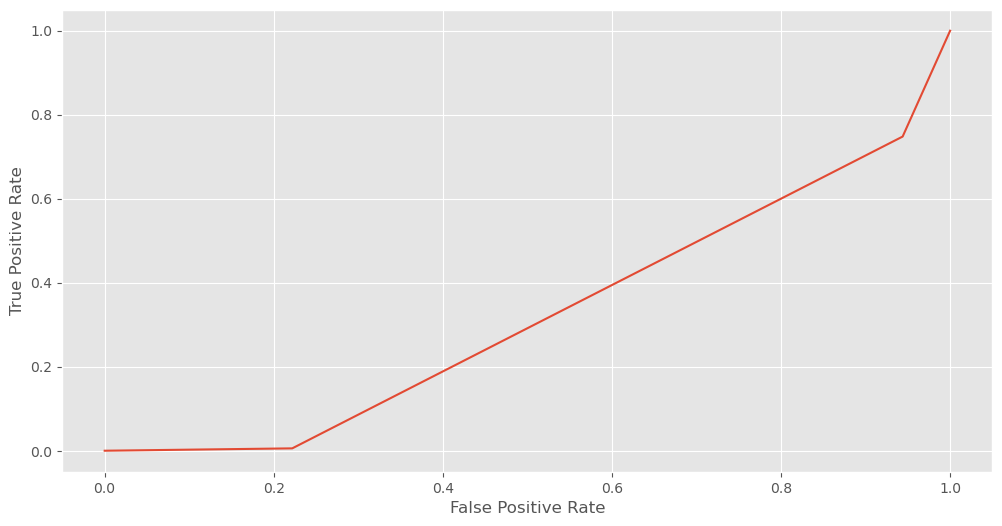

In [39]:
print("Curva ROC para la clase minoritaria (0)")
fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=0)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Curva ROC para la clase mayoritaria (1)


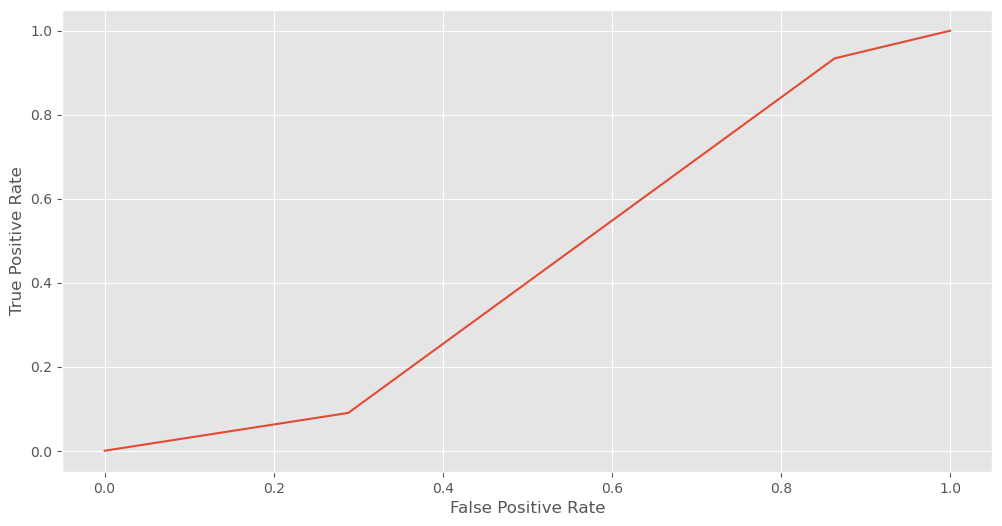

In [40]:
print("Curva ROC para la clase mayoritaria (1)")
fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Curva ROC para la clase minoritaria (2)


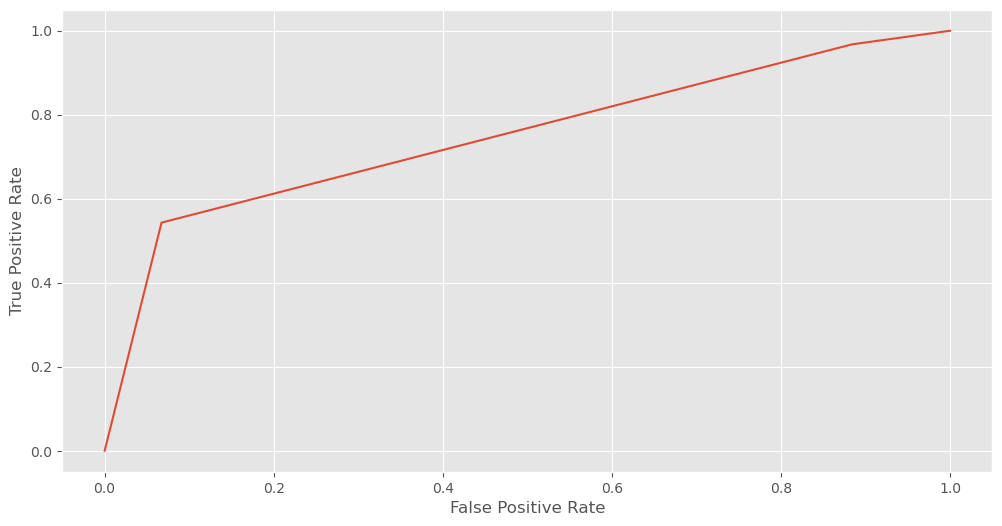

In [41]:
print("Curva ROC para la clase minoritaria (2)")
fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=2)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [42]:
print("Área bajo la curva ROC es: ")
print(roc_auc_score(y_test, RFC.predict_proba(X_test), multi_class='ovr'))

Área bajo la curva ROC es: 
0.8040528760094731


### [Gradient Boosting](#Contenidos.) <a class="anchor" id="gb"></a>

In [43]:
""" Entrenamiento, prueba, reporte y métricas del modelo de Gradiente Boosting """

GBC = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,
                                 max_depth=5)
GBC.fit(X_train,y_train)

y_pred_train = GBC.predict(X_train)
y_pred_test = GBC.predict(X_test)

print("Reporte de modelo con datos de entrenamiento")
print(classification_report(y_train, y_pred_train))
print("----------------------------------------------------")
print("Reporte de modelo con datos de prueba")
print(classification_report(y_test, y_pred_test))

Reporte de modelo con datos de entrenamiento
              precision    recall  f1-score   support

           0       0.58      0.45      0.51      9984
           1       0.71      0.84      0.77     26963
           2       0.79      0.58      0.67     11065

    accuracy                           0.70     48012
   macro avg       0.69      0.63      0.65     48012
weighted avg       0.70      0.70      0.69     48012

----------------------------------------------------
Reporte de modelo con datos de prueba
              precision    recall  f1-score   support

           0       0.51      0.39      0.44      2496
           1       0.68      0.81      0.74      6741
           2       0.73      0.53      0.61      2766

    accuracy                           0.66     12003
   macro avg       0.64      0.58      0.60     12003
weighted avg       0.66      0.66      0.65     12003



Matriz de confusión para los datos de prueba


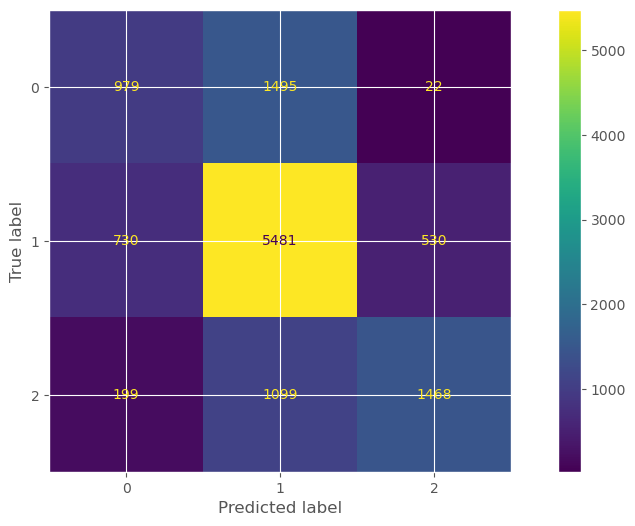

In [44]:
print("Matriz de confusión para los datos de prueba")
cm = confusion_matrix(y_test, y_pred_test, labels=GBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GBC.classes_)
disp.plot()
plt.show()

Matriz de confusión para los datos de entrenamiento


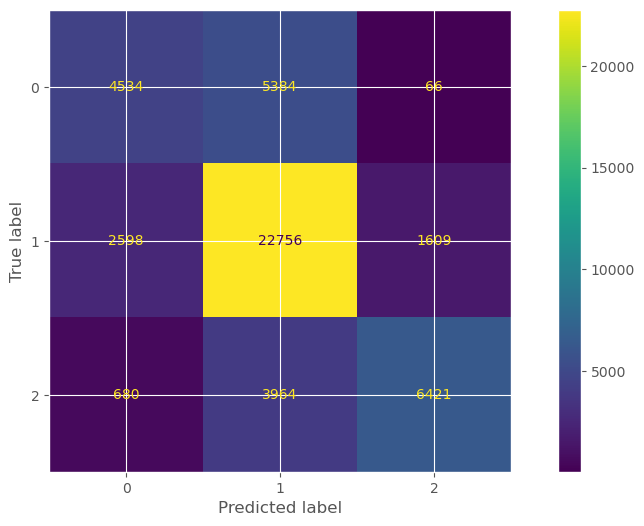

In [45]:
print("Matriz de confusión para los datos de entrenamiento")
cm = confusion_matrix(y_train, y_pred_train, labels=GBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GBC.classes_)
disp.plot()
plt.show()

Curva ROC para la clase minoritaria (0)


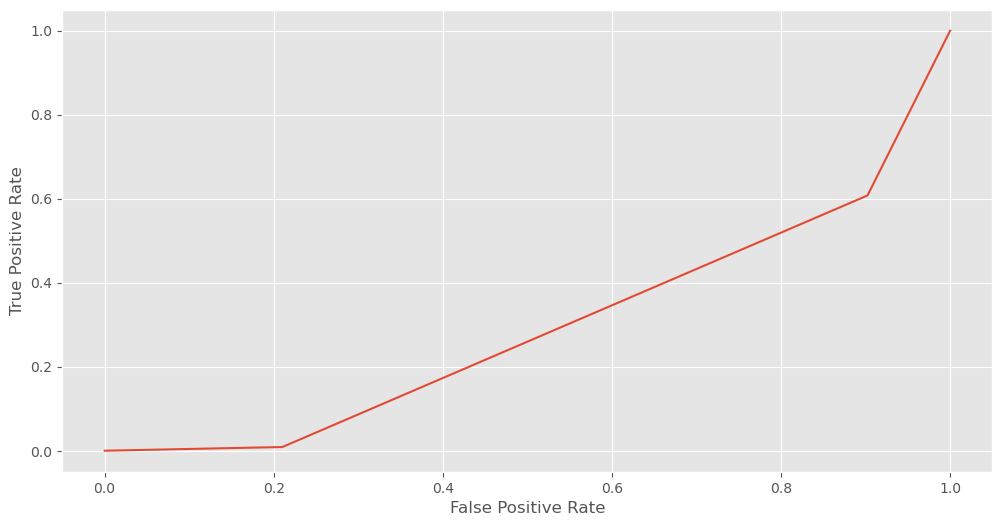

In [46]:
print("Curva ROC para la clase minoritaria (0)")
fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=0)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Curva ROC para la clase mayoritaria (1)


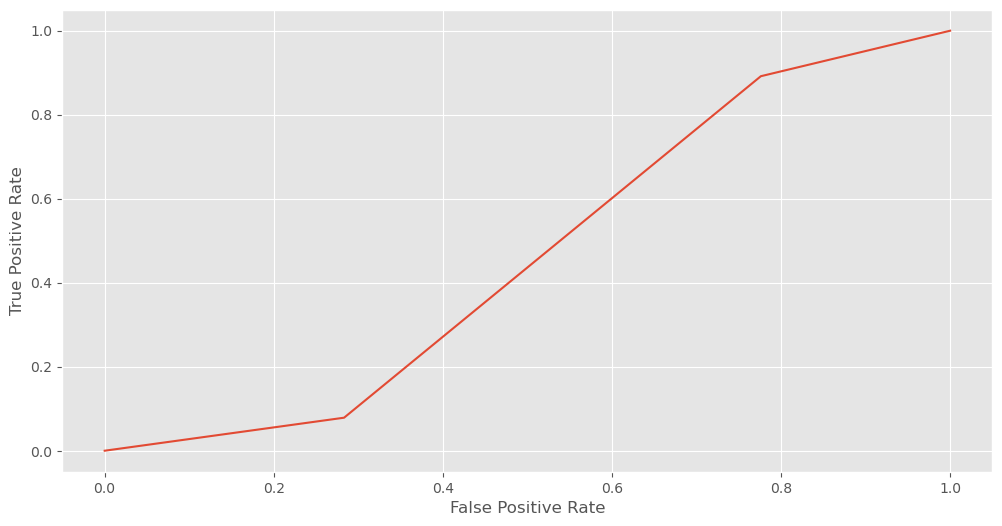

In [47]:
print("Curva ROC para la clase mayoritaria (1)")
fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Curva ROC para la clase minoritaria (2)


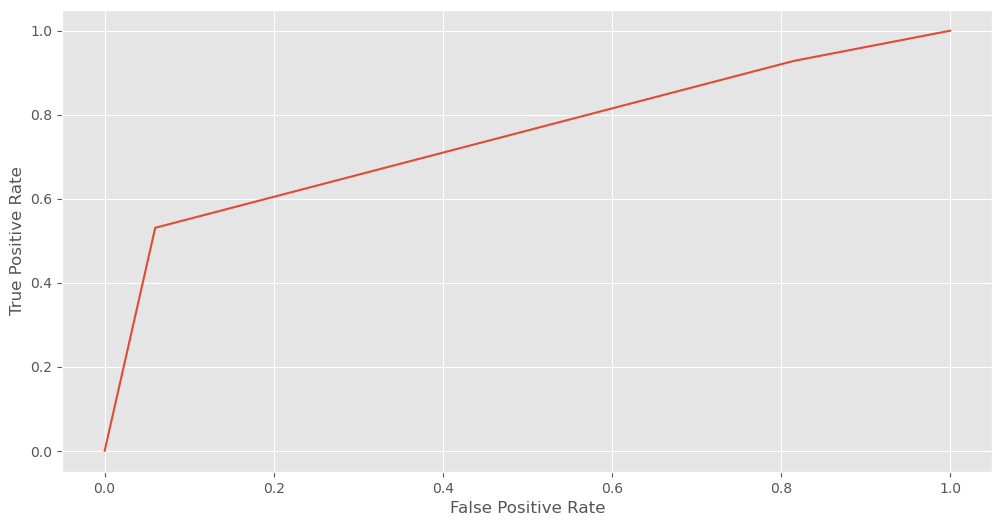

In [48]:
print("Curva ROC para la clase minoritaria (2)")
fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=2)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [49]:
print("Área bajo la curva ROC es: ")
print(roc_auc_score(y_test, GBC.predict_proba(X_test), multi_class='ovr'))

Área bajo la curva ROC es: 
0.8000028519445239


## [Parte 4. Análisis y conclusiones](#Contenidos.) <a class="anchor" id="parte_4"></a>

El set de datos original viene muy sucio, tiene muchos datos nulos, muchas etiquetas sin significado en las columnas no numéricas, y valores en rangos anómalos en las columnas numéricas. Aunado a lo anterior, las clases de la columna ‘Credit_Score’ estaban desde el inicio muy desbalanceadas, en particular, las etiquetas de tipo “Standard” aparecían hasta más del doble de veces que las etiquetas “Poor” y “Good”. 


El set de datos presenta inconsistencias como el hecho de que los días en atraso no coincidiera con el número de atrasos, lo cual suele ser el predicto principal para un mal comportamiento de pago.



Debido a lo anterior, se recomendaría mejorar la base de datos original, o en su defecto, realizar una buena limpieza del set de datos, como fue mi caso. Para crear un modelo de clasificación con los datos que se tiene, se tuvieron que codificar las columnas no numéricas, filtrar los valores numéricos anómalos de las otras columnas, y eliminar características que no demuestren relación con la variable objetivo, que en este caso es ‘Credit_Score’.

El filtrado de observaciones con valores anómalos se realizó con base en la intuición; por ejemplo, se eliminaron valores negativos en columnas que no tiene sentido que tengan valores inferiores a cero. Siguiendo lo anterior, me enfoqué en que el caso de estudio del ejercicio se enfocara en clientes con características que se consideraran “comunes”. 

Por otro lado, referente al filtrado de características, hubo columnas que tuvieron que ser eliminadas debido a que no podían ser codificadas, mientras que otras fueron eliminadas debido a que aún siendo codificadas no mostraban correlación con la variable objetivo y presentaban muchos valores nulos en el dataset original, antes de su codificación, lo que nos hace intuir que estas características son inconsistentes con las pocas observaciones que tienen.
Referente a los modelos de clasificación, se probaron 4 modelos: Naive Bayes, Regresión Logística, Random Forest, y Gradient Boosting Trees.


Luego, el modelo de Regresión Logística (RL) tiene un valor de ‘accuracy’ consistente en los sets de entrenamiento y prueba, por lo que nuevamente se descarta el sobreajuste, aunque no el sub-ajuste. A diferencia del modelo anterior, el F1-score de la clase mayoritaria (1) es alto, sin embargo, esta misma métrica ya no es consistente en el resto de las clases, por lo que es evidente que este modelo es muy afectado por el desbalanceo de clases.  De hecho, las clases minoritarias (0,2) tienen un fuerte problema con los falsos negativos, lo que hace que su ‘Recall’ sea muy bajo, aunque la métrica de ‘precision’ tampoco es particularmente alta. Lo anterior se confirma en las respectivas matrices de confusión, particularmente para la clase mayoritaria (1) que es la única con una cantidad considerable de predicciones correctas, pero con una importante cantidad de falsos positivos.

Las curvas ROC de este modelo no mejoran mucho respecto al anterior. Nuevamente, se ve que este modelo tiene un mal desempeño al clasificar la clase minoritaria (0) a comparación de las otras dos clases (1,2), con mejores curvas ROC. El valor de AUC del modelo es muy similar al anterior, y en este caso es mucho más evidente que la clasificación de observaciones en la clase mayoritaria aporta mucho al desempeño promedio de la clasificación. 


El modelo de Random Forest (RF) tiene valores de ‘accuracy’ más altos que los anteriores, aunque aún sin ser sobresalientes, sin embargo, no hay pruebas de sobre ajuste, aunque sí existe la posibilidad de un sub ajuste debido al bajo valor de sus métricas. En este modelo, los f1-score de las clases (1,2) no están tan separados, mientras que el valor de esta métrica para la clase (0) es muy bajo. Similar al modelo RL, la clasificación de las clases minoritarias tienen un problema con los falsos negativos que se sabe debido a su bajo ‘Recall’, mientras que la clase mayoritaria (1) tiene un valor de ‘precision’ bajo, lo que indica una importante presencia de falsos positivos. Lo anterior se confirma en las respectivas matrices de confusión, particularmente para la clase minoritaria (0) que tiene una cantidad de predicciones correctas muy inferior a comparación de las otras clases.    

Las curvas ROC de este modelo son muy similares a las del modelo de RL. Al igual que en los casos anteriores, el modelo de Random Forest tiene deficiencias al clasificar la clase minoritaria (0), mientras que la clasificación de las otras dos clases (1,2) no es tan negativa. El valor de AUC del modelo es claramente mayor a los dos anteriores, y ya se puede considerar como un buen valor de esta métrica, sin embargo, de las demás métricas sabemos que el modelo tiene una importante deficiencia al clasificar las observaciones en la clase (0), a diferencia de las otras dos clases, por lo que seguramente este sea poco útil para la clasificación de algunas observaciones. 




Finalmente, el modelo de Gradient Boosting (GBC) tuvo los mejores resultados de ‘accuracy’ sobre el resto de los modelos, aunque es evidente la diferencia que hay entre esta métrica obtenida con los datos de entrenamiento y la obtenida con los datos de prueba, lo que podría ser un indicativo de sobre ajuste. A pesar de lo anterior y a diferencia de los anteriores modelos, en este caso se reduce el impacto del subajuste. Por otro lado, las métricas F1-score para cada clase son relativamente similares, habiendo una clase, la mayoritaria (1), con una métrica claramente superior a las otras dos. De las clases minoritarias, no hay ningún valor de ‘Precision’ o ‘Recall’ que sea particularmente bajo, sino que ambas métricas están balanceadas indicando una cantidad similar de falsos positivos y falsos negativos. Lo antes descrito se demuestra en las matrices de confusión donde hay una clara mejora en la cantidad de predicciones acertadas para todas las clases. 

Ahora bien, las curvas ROC del modelo demuestran que hay sólo una clase, la minoritaria 0, cuya clasificación por parte del modelo es deficiente, mientras que las otras dos tienen una curva que describe una clasificación apropiada. Siguiendo lo anterior, el valor AUC obtenido es bastante elevado, lo que es de esperarse considerando que este modelo de Gradiente Boosting no es tan penalizado por el desbalanceo de clases al momento de su clasificación.


En conclusión, es claro que los modelos de tipo ensamble como son el Random Forest y Gradient Boosting tuvieron las mejores métricas del resto, y el tiempo de entrenamiento de estos mismos modelos también fue superior, lo que es un factor importante para tomar en cuenta si se quiere trabajar con grandes volúmenes de datos e hiperparámetros complejos. El set de datos con el que se trabajó en este caso tuvo que ser bien limpiado y filtrado, y aún así, debido al desbalanceo de sus clases, fue complicado hacer que los modelos de clasificación tuvieran un buen desempeño tanto global como individualmente. Los hiperparámetros de cada modelo fueron ajustados manualmente, haciendo pruebas empíricas, para encontrar un buen desempeño relativo, aunque esta labor podría ser optimizada utilizando las técnicas de Random Search, Grid Search, Algoritmos Genéticos, entre otros, para encontrar los hiperparámetros que optimicen las métricas de los modelos. En mi caso, si tuviera que escoger un algoritmo para utilizarlo, el Gradient Boosting es el que tiene mejores métricas, no se ve tan afectado individualmente por el desbalanceo de clases, no presenta síntomas severos de sobre ajuste o sub ajuste, sus hiperparámetros son fáciles de manipular y variar para obtener empíricamente la mejor combinación, y en conjunto es un modelo de clasificación que aunque tardado, es bastante robusto para predecir a partir de las características ['Num_of_Loan' , 'Delay_from_due_date' ,  'Num_Credit_Inquiries' , 'Outstanding_Debt' , 'Payment_of_Min_Amount'] de un cliente, su calificación crediticia [ ‘Credit_Score’ ].  